This notebook looks at the abundance of "butyrate producers" in the donor samples and if that correlates with FMT outcome.

I'll mostly be following similar analyses as what I did in the Jacob 2017 notebook (which follows what I did in the Kump 2018 notebook).

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('white')

In [2]:
fotu = '../../data/qiime-proc/goyal2018/exported_data/goyal2018.feature-table.txt'
fmeta = '../../data/clean/goyal2018.metadata.txt'
ftidy = '../../data/clean/goyal2018.tidy_otu_w_taxonomy.txt'

In [3]:
tidydf = pd.read_csv(ftidy, sep='\t')
# Add relative abundance column
tidydf['rel_abun'] = tidydf['reads'] / tidydf['total_reads']
tidydf.head()

,sample_id,total_reads,#OTU ID,reads,Feature ID_gg,Taxon_gg,Confidence_gg,otu_id_gg,Feature ID_silva,Taxon_silva,Confidence_silva,otu_id_silva,rel_abun
0,FMT.03.042.W,38400.0,90139774f761b15ef73f969b9efd29c7,2194.0,90139774f761b15ef73f969b9efd29c7,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.901875,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,90139774f761b15ef73f969b9efd29c7,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.983186,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.057135
1,FMT.01.022.W,6342.0,90139774f761b15ef73f969b9efd29c7,78.0,90139774f761b15ef73f969b9efd29c7,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.901875,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,90139774f761b15ef73f969b9efd29c7,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.983186,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.012299
2,FMT.01.022.6M,9377.0,90139774f761b15ef73f969b9efd29c7,0.0,90139774f761b15ef73f969b9efd29c7,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.901875,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,90139774f761b15ef73f969b9efd29c7,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.983186,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.000000
3,FMT.03.032.M,15149.0,90139774f761b15ef73f969b9efd29c7,2414.0,90139774f761b15ef73f969b9efd29c7,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.901875,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,90139774f761b15ef73f969b9efd29c7,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.983186,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.159350
4,FMT.01.007.D,7729.0,90139774f761b15ef73f969b9efd29c7,15.0,90139774f761b15ef73f969b9efd29c7,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.901875,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,90139774f761b15ef73f969b9efd29c7,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.983186,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.001941


# Find butyrate producers

As before, we'll use the list from the mSystems paper (see the Kump 2018 notebook for more info).


In [4]:
genera = ['Odoribacter', 
          'Clostridium_XIVa',
          'Coprococcus',
          'Butyricicoccus',
          'Pseudoflavonifractor',
          'Flavonifractor',
          'Anaerostipes',
          'Roseburia',
          'Oscillibacter',
          'Faecalibacterium',
          'Subdoligranulum'
         ]

## Compare SILVA vs GG

How many of the GreenGenes taxonomic identifiers have one of these?

In [5]:
alltaxa_gg = tidydf['otu_id_gg'].unique().tolist()

for g in genera:
    print(g)
    tmp = [i for i in alltaxa_gg if 'g__' + g in i]
    tmp = set([i.rsplit(';', 1)[0] for i in tmp])
    print('\n'.join(tmp) + '\n')

Odoribacter
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__[Odoribacteraceae];g__Odoribacter;s__

Clostridium_XIVa


Coprococcus
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Coprococcus;s__
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Coprococcus;s__catus
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Coprococcus;s__eutactus

Butyricicoccus
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Butyricicoccus;s__pullicaecorum

Pseudoflavonifractor


Flavonifractor


Anaerostipes
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Anaerostipes;s__

Roseburia
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Roseburia;s__faecis
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Roseburia;s__

Oscillibacter


Faecalibacterium
k__Bacteria;p__Firmicutes;c__Clostridia;o_

In [6]:
alltaxa_silva = tidydf['otu_id_silva'].unique().tolist()

for g in genera:
    print(g)
    tmp = [i for i in alltaxa_silva if g in i]
    tmp = set([i.rsplit(';', 1)[0] for i in tmp])
    print('\n'.join(tmp) + '\n') 

Odoribacter
D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroidia;D_3__Bacteroidales;D_4__Marinifilaceae;D_5__Odoribacter;D_6__gutmetagenome
D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroidia;D_3__Bacteroidales;D_4__Marinifilaceae;D_5__Odoribacter;D_6__

Clostridium_XIVa


Coprococcus
D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;D_3__Clostridiales;D_4__Lachnospiraceae;D_5__Coprococcus2;D_6__
D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;D_3__Clostridiales;D_4__Lachnospiraceae;D_5__Coprococcus3;D_6__
D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;D_3__Clostridiales;D_4__Lachnospiraceae;D_5__Coprococcus2;D_6__unculturedCoprococcussp.
D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;D_3__Clostridiales;D_4__Lachnospiraceae;D_5__Coprococcus1;D_6__

Butyricicoccus
D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;D_3__Clostridiales;D_4__Ruminococcaceae;D_5__Butyricicoccus;D_6__Butyricicoccuspullicaecorum1.2
D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;D_3__Clostridiales;D_4__Ruminococcaceae;D_5__Butyri

In [7]:
# Make a list of the OTUs that are butyrate producing genera
but_silva = []
for g in genera:
    but_silva += [i for i in alltaxa_silva if g in i]
but_silva = list(set(but_silva))

but_gg = []
for g in genera:
    but_gg += [i for i in alltaxa_gg if g in i]
but_gg = list(set(but_gg))

print(len(but_gg), len(but_silva))

(177, 151)


In [8]:
but_abun_gg = tidydf.query('otu_id_gg == @but_gg').groupby('sample_id').sum()['rel_abun']
but_abun_silva = tidydf.query('otu_id_silva == @but_silva').groupby('sample_id').sum()['rel_abun']

(0, 0.7)

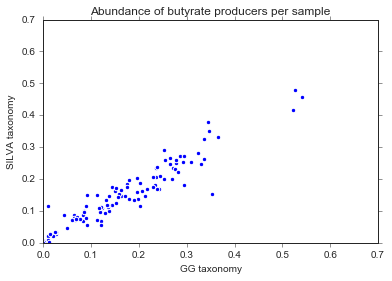

In [11]:
data = pd.merge(
    but_abun_gg.reset_index(name='gg_abun'), 
    but_abun_silva.reset_index(name='silva_abun'))

plt.scatter(data['gg_abun'], data['silva_abun'])
plt.xlabel('GG taxonomy')
plt.ylabel('SILVA taxonomy')
plt.title('Abundance of butyrate producers per sample')
plt.ylim([0, 0.7])
plt.xlim([0, 0.7])

# Butyrate producers in donors

Next, let's look at the abundance of these bugs in the donors, stratified by whether their patient was a responder or non-responder.

In [13]:
meta = pd.read_csv(fmeta, sep='\t')
meta.head()

,study_accession,secondary_study_accession,sample_accession,secondary_sample_accession,experiment_accession,run_accession,submission_accession,tax_id,scientific_name,instrument_platform,...,Patient # dds 1/26/15,Screen,Week 1,Month 1,Month 6,Notes,remission_m1,response_m1,remission_m6,response_m6
0,PRJNA380944,SRP102742,SAMN06652281,SRS2088440,SRX2691263,SRR5396454,SRA550516,408170,human gut metagenome,ILLUMINA,...,042 JJC,10.0,0.0,0.0,NaN,NaN,True,True,False,False
1,PRJNA380944,SRP102742,SAMN06652280,SRS2088438,SRX2691264,SRR5396455,SRA550516,408170,human gut metagenome,ILLUMINA,...,042 JJC,10.0,0.0,0.0,NaN,NaN,True,True,False,False
2,PRJNA380944,SRP102742,SAMN06652279,SRS2088439,SRX2691265,SRR5396456,SRA550516,408170,human gut metagenome,ILLUMINA,...,042 JJC,10.0,0.0,0.0,NaN,NaN,True,True,False,False
3,PRJNA380944,SRP102742,SAMN06652278,SRS2088441,SRX2691266,SRR5396457,SRA550516,408170,human gut metagenome,ILLUMINA,...,040 RJ,27.5,10.0,10.0,0.0,NaN,False,True,True,True
4,PRJNA380944,SRP102742,SAMN06652277,SRS2088442,SRX2691267,SRR5396458,SRA550516,408170,human gut metagenome,ILLUMINA,...,040 RJ,27.5,10.0,10.0,0.0,NaN,False,True,True,True


In [15]:
# Combine tidy OTU table with metadata
tidydf = pd.merge(tidydf, meta, left_on='sample_id', right_on='sample_alias')

In [18]:
meta.columns

Index([u'study_accession', u'secondary_study_accession', u'sample_accession',
       u'secondary_sample_accession', u'experiment_accession',
       u'run_accession', u'submission_accession', u'tax_id',
       u'scientific_name', u'instrument_platform', u'instrument_model',
       u'library_name', u'library_layout', u'nominal_length',
       u'library_strategy', u'library_source', u'library_selection',
       u'read_count', u'base_count', u'center_name', u'first_public',
       u'last_updated', u'experiment_title', u'study_title', u'study_alias',
       u'experiment_alias', u'run_alias', u'fastq_bytes', u'fastq_md5',
       u'fastq_ftp', u'fastq_aspera', u'fastq_galaxy', u'submitted_bytes',
       u'submitted_md5', u'submitted_ftp', u'submitted_aspera',
       u'submitted_galaxy', u'submitted_format', u'sra_bytes', u'sra_md5',
       u'sra_ftp', u'sra_aspera', u'sra_galaxy', u'cram_index_ftp',
       u'cram_index_aspera', u'cram_index_galaxy', u'sample_alias',
       u'broker_name', u'n

In [22]:
# Total abundance of butyrate producers per donor stool
# (The groupby is to keep track of other metadata of interest)
donor_but = (tidydf
    .query('otu_id_gg == @but_gg')
    .query('(sample_type == "D") | (sample_type == "D2")')
    .groupby(['sample_id', 'patient_id', 'sample_type', 'time_point', 
              'remission_m1', 'response_m1',
              'remission_m6', 'response_m6'])
    .sum()
    ['rel_abun']
).reset_index()
donor_but

,sample_id,patient_id,sample_type,time_point,remission_m1,response_m1,remission_m6,response_m6,rel_abun
0,FMT.01.004.D,4,D,donor,False,False,False,False,0.144642
1,FMT.01.005.D,5,D,donor,False,True,False,True,0.149870
2,FMT.01.007.D,7,D,donor,False,True,False,False,0.112822
3,FMT.01.010.D,10,D,donor,True,True,False,False,0.162913
4,FMT.01.011.D,11,D,donor,True,True,True,True,0.129837
5,FMT.01.016.D,16,D,donor,False,True,False,True,0.061221
6,FMT.01.022.D,22,D,donor,False,True,False,True,0.050515
7,FMT.01.023.D,23,D,donor,False,True,False,True,0.213824
8,FMT.01.024.D2,24,D2,donor,False,False,False,False,0.025766
9,FMT.01.028.D,28,D,donor,False,True,False,True,0.155573


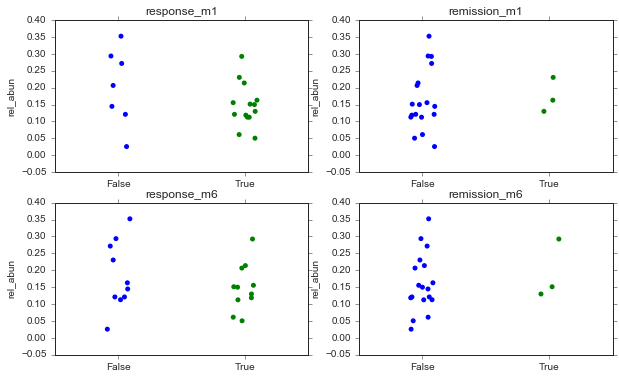

In [26]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
ax = ax.flatten()

i = 0
x = 'response_m1'
sns.stripplot(data=donor_but, x=x, y='rel_abun', ax=ax[i])
ax[i].set_title(x)
ax[i].set_xlabel('')


i = 1
x = 'remission_m1'
sns.stripplot(data=donor_but, x=x, y='rel_abun', ax=ax[i])
ax[i].set_title(x)
ax[i].set_xlabel('')

i = 2
x = 'response_m6'
sns.stripplot(data=donor_but, x=x, y='rel_abun', ax=ax[i])
ax[i].set_title(x)
ax[i].set_xlabel('')

i = 3
x = 'remission_m6'
sns.stripplot(data=donor_but, x=x, y='rel_abun', ax=ax[i])
ax[i].set_title(x)
ax[i].set_xlabel('')
